In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
Nx          = 400    # resolution x-dir
Ny          = 100    # resolution y-dir
rho0        = 100    # average density
tau         = 0.6    # collision timescale
Nt          = 25   # number of timesteps

# Lattice speeds / weights
NL = 9
idxs = np.arange(NL)
cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1
X, Y = np.meshgrid(range(Nx), range(Ny))


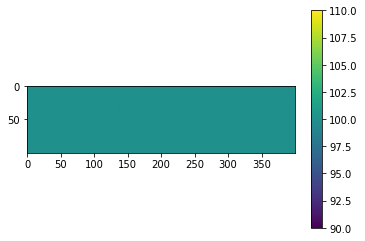

In [54]:
# Initial Conditions - flow to the right with some perturbations
F = np.ones((Ny,Nx,NL)) + 0.01*np.random.randn(Ny,Nx,NL)
F[:,:,3] += 2 * (1+0.2*np.cos(2*np.pi*X/Nx*4))
rho = np.sum(F,2)
for i in idxs:
  F[:,:,i] *= rho0 / rho

# Cylinder boundary
cylinder = (X - Nx/4)**2 + (Y - Ny/2)**2 < (Ny/4)**2

plt.imshow(F.sum(2))
plt.colorbar()
F.sum(2).mean()

729993467 99.99999999999862
159 66.21394561933873 129.48508621079168 99.99999999999862
160 68.44525946142937 129.5193853329501 99.99999999999861
161 66.14578740528015 129.13869060758537 99.99999999999861
162 68.31617982668652 129.1366026908253 99.99999999999861
163 66.08316107898399 128.73134480082825 99.9999999999986
164 68.1914683160809 128.70167445241526 99.9999999999986
165 66.0251030069844 128.29288173521223 99.99999999999856
166 68.07396586326276 128.25510290885282 99.99999999999856
167 65.97119962126212 127.82768635496339 99.99999999999855
168 67.96613728235984 127.77950088539414 99.99999999999855
169 65.92186053709773 127.35059928147243 99.99999999999854
170 67.86817891080779 127.28506031976103 99.99999999999854
171 65.87865204220667 126.83043489137603 99.99999999999851
172 67.77806189167035 126.7510991641983 99.99999999999852
173 65.84455001241436 126.29073585584027 99.9999999999985
174 67.69308992835072 126.2069882618922 99.9999999999985
175 65.82431915778317 125.729423718687

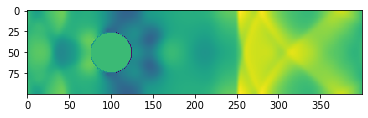

In [49]:
Nt = 500

# Simulation Main Loop
for it in range(Nt):
    
    # Drift
    for i, cx, cy in zip(idxs, cxs, cys):
        F[:,:,i] = np.roll(F[:,:,i], cx, axis=1)
        F[:,:,i] = np.roll(F[:,:,i], cy, axis=0)
    
    # Set reflective boundaries
    bndryF = F[cylinder,:]
    bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
    
    # Calculate fluid variables
    rho = np.sum(F,2)
    ux  = np.sum(F*cxs,2) / rho
    uy  = np.sum(F*cys,2) / rho
    
    # Apply Collision
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(idxs, cxs, cys, weights):
        Feq[:,:,i] = rho*w* (1 + 3*(cx*ux+cy*uy) + 9*(cx*ux+cy*uy)**2/2 - 3*(ux**2+uy**2)/2)
    
    F += -(1.0/tau) * (F - Feq)
    
    # Apply boundary 
    F[cylinder,:] = bndryF
    # print(it, F.sum(), F.min(), F.max(), F.mean())
    print(it, F.sum(2).min(), F.sum(2).max(), F.sum(2).mean())
plt.imshow(F.sum(2))

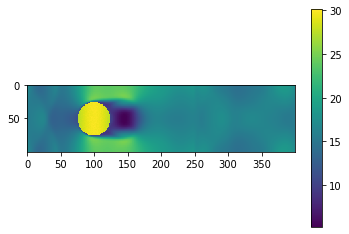

In [50]:
plt.imshow(F[:,:,3])
plt.colorbar()

In [14]:
F[cylinder,:]#.shape


array([[ 8.84954068,  8.72902734,  8.84733509, ...,  2.41741265,
         9.89118211,  8.72105219],
       [ 8.87155508,  8.90676674,  8.77194096, ...,  2.48588934,
         8.75798056,  8.63318756],
       [ 8.72798473,  9.00723706,  8.89334845, ...,  2.35231154,
         8.68980102,  8.76868644],
       ...,
       [ 8.72958182, 10.12793122,  2.56271119, ...,  8.75204815,
         8.71299594,  2.50229411],
       [ 8.77193108, 10.21285324,  2.59816882, ...,  8.78649012,
         8.74602022,  2.51871728],
       [ 8.78189135, 10.24792607,  2.6058204 , ...,  8.70285353,
         8.95068989,  2.52933748]])

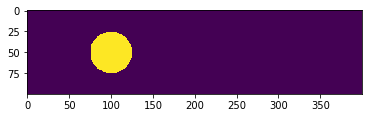

In [16]:
plt.imshow(cylinder)

In [27]:
[(v.max(),v.min()) for v in [ux,uy]]

[(0.37025839270947386, -0.08976837462211418),
 (0.14171080561332705, -0.14191478733198143)]